Imports & Load Data

In [325]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
# Load dataset
df = pd.read_csv('data/Startup_Scoring_Dataset.csv')
df

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,7,789,66299,6091495,4183839,263247468
1,S002,4,939,34866,9106842,666326,172927107
2,S003,8,42,73630,8817088,649150,313090455
3,S004,5,57,93657,6374167,20153173,305887183
4,S005,7,512,61187,841971,118834,84815222
...,...,...,...,...,...,...,...
95,S096,10,327,51507,8887590,49655442,98146618
96,S097,9,686,66790,1222622,13470137,439431826
97,S098,7,234,4599,2553771,4466271,70995760
98,S099,9,828,6395,3227825,34907127,239717603


In [327]:
df.head()

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,7,789,66299,6091495,4183839,263247468
1,S002,4,939,34866,9106842,666326,172927107
2,S003,8,42,73630,8817088,649150,313090455
3,S004,5,57,93657,6374167,20153173,305887183
4,S005,7,512,61187,841971,118834,84815222


In [328]:
df.describe()

,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.910000,548.500000,52002.670000,5.271927e+06,2.256808e+07,2.316022e+08
std,2.871296,270.025046,29193.444748,2.801648e+06,1.633037e+07,1.388826e+08
min,1.000000,14.000000,954.000000,1.663810e+05,1.188340e+05,1.007064e+07
25%,3.000000,346.750000,26729.250000,2.928578e+06,5.996659e+06,1.121723e+08
50%,6.000000,578.000000,52472.500000,5.277296e+06,2.214305e+07,2.437296e+08
75%,8.000000,755.000000,74684.750000,7.694987e+06,3.549996e+07,3.198588e+08
max,10.000000,996.000000,98606.000000,9.931393e+06,4.965544e+07,4.978948e+08


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   startup_id               100 non-null    object
 1   team_experience          100 non-null    int64 
 2   market_size_million_usd  100 non-null    int64 
 3   monthly_active_users     100 non-null    int64 
 4   monthly_burn_rate_inr    100 non-null    int64 
 5   funds_raised_inr         100 non-null    int64 
 6   valuation_inr            100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [330]:
print(df.shape)

(100, 7)


Data Preprocessing & Normalization

In [331]:
# Min-Max scaling function
scaler = MinMaxScaler()

# Positively correlated features (higher = better)
pos_features = ['team_experience', 'market_size_million_usd', 'monthly_active_users', 
                'funds_raised_inr', 'valuation_inr']

In [332]:
# Negatively correlated feature (higher = worse)
neg_features = ['monthly_burn_rate_inr']

In [333]:
# Normalize positive features
df_scaled = df.copy()
df_scaled[pos_features] = scaler.fit_transform(df[pos_features])

In [334]:
# Normalize negative features (reverse scoring)
df_scaled[neg_features] = 1 - scaler.fit_transform(df[neg_features])

Define Scoring Formula (Composite Score)

In [335]:
# Feature weights (based on business intuition)
weights = {
    'team_experience': 0.15,
    'market_size_million_usd': 0.20,
    'monthly_active_users': 0.25,
    'monthly_burn_rate_inr': 0.10,
    'funds_raised_inr': 0.15,
    'valuation_inr': 0.15
}

In [336]:
# Compute weighted score
df_scaled['composite_score'] = sum(
    df_scaled[feature] * weight for feature, weight in weights.items()
) * 100  # final score out of 100

Ranking and Interpretation

In [337]:
# Rank startups
df_scaled['rank'] = df_scaled['composite_score'].rank(ascending=False)
df_sorted = df_scaled.sort_values(by='composite_score', ascending=False)

In [338]:
# Top 10 and Bottom 10
top_10 = df_sorted.head(10)
bottom_10 = df_sorted.tail(10)

In [339]:
top_10[['startup_id', 'composite_score']]

,startup_id,composite_score
5,S006,81.037331
76,S077,77.047933
44,S045,75.655026
32,S033,74.936099
12,S013,74.675295
28,S029,73.114982
96,S097,70.037973
11,S012,69.810579
7,S008,69.671483
42,S043,69.554850


In [340]:
bottom_10[['startup_id', 'composite_score']]

,startup_id,composite_score
73,S074,33.662372
16,S017,33.527899
60,S061,32.964227
50,S051,32.321262
78,S079,30.430187
83,S084,30.144740
57,S058,28.567332
22,S023,26.262269
97,S098,26.158777
54,S055,19.094732


Visualizations

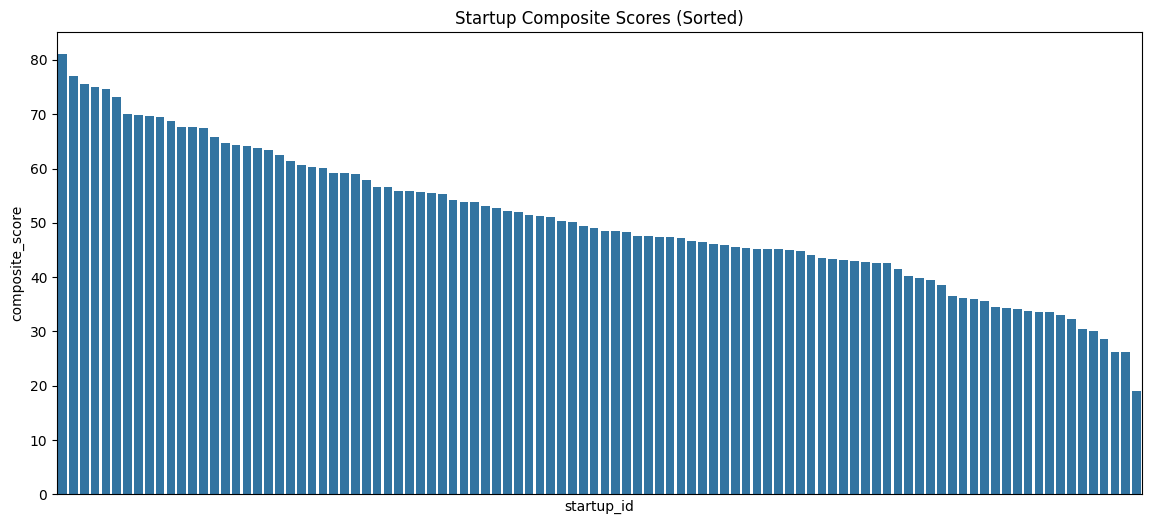

In [ ]:
# Bar chart of scores
plt.figure(figsize=(14,6))
sns.barplot(x='startup_id', y='composite_score', data=df_sorted)
plt.xticks([], [])
plt.title("Startup Composite Scores (Sorted)")
plt.savefig('outputs/bar_chart.png')
plt.show()

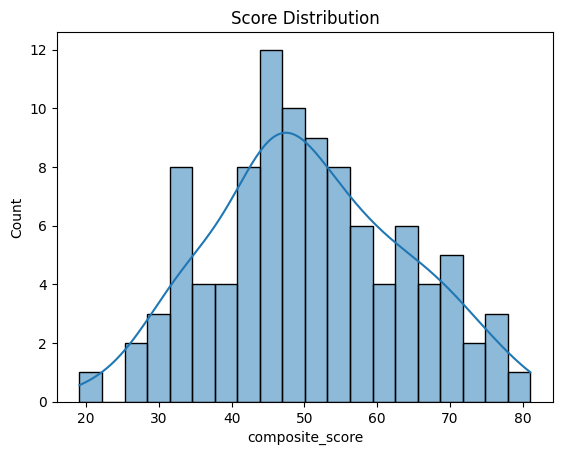

In [ ]:
# Score distribution
sns.histplot(df_scaled['composite_score'], bins=20, kde=True)
plt.title("Score Distribution")
plt.savefig('outputs/score_distribution.png')
plt.show()

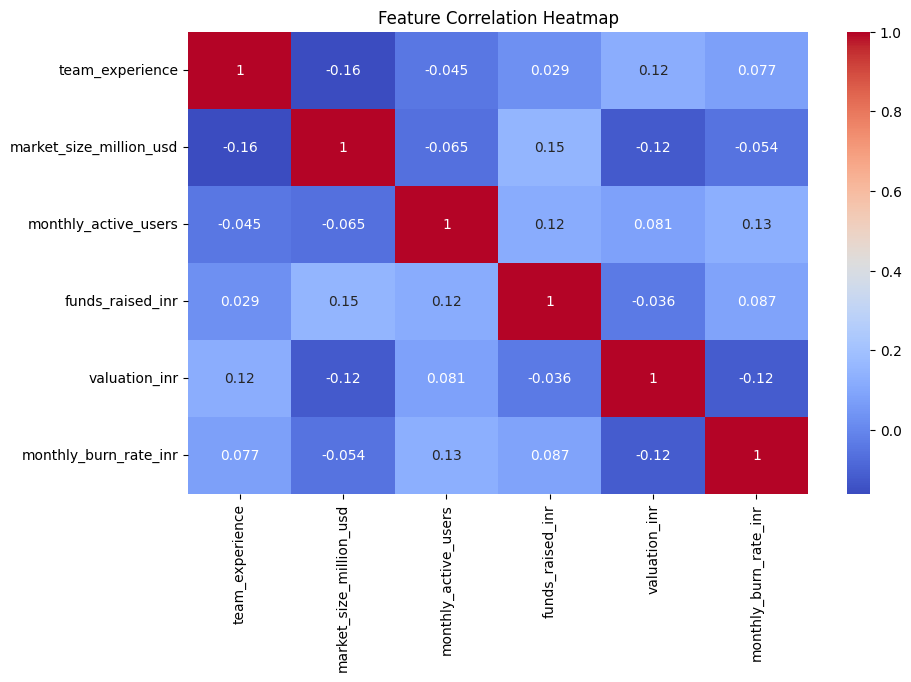

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_scaled[pos_features + neg_features].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.savefig('outputs/correlation_heatmap.png')
plt.show()

Model Evaluation & Feature Importance

In [344]:
# Simulate: Try predicting the composite score using a regression model
X = df_scaled[pos_features + neg_features]
y = df_scaled['composite_score']

In [345]:
model = RandomForestRegressor()
cv_rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
print("Cross-Validated RMSE:", cv_rmse.mean())

Cross-Validated RMSE: 6.32102568204956


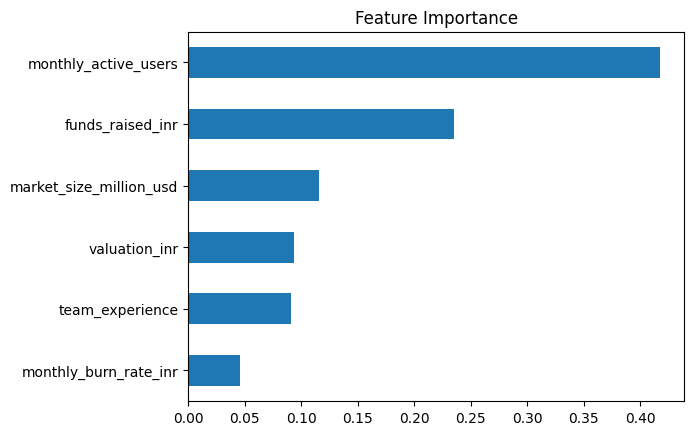

In [ ]:
# Feature importance
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.savefig('outputs/feature_importance.png')
plt.show()